# Question: How accurately can we predict MLB Hall of Fame members based on their offensive performance?  

### Type of Problem: Supervised, Classification Machine Learning  

### Steps involved in this classification machine learning problem:
1. Find/import the data
2. Data preprocessing
3. Exploratory data analysis (EDA)
4. Feature engineering & selection
5. Model training
6. Model evaluation
7. Conclusion

## Find/Import The Data  
**Dataset Description:**  
The data used in this project was taken from baseball reference. Specifically, the dataset contains MLB position players who debuted after 1946 (In order to include non-white players) and played their final game before 2018. Every player in the dataset played in >= 750 games in their career (Since the hall of fame requires members to play at minimum 764 games). The dataset contains 43 features including a wide range of statistis such as batting average (BA), wins above replacement (WAR), home runs (HR), and so on.  

**Target Variable:** 'HOF Status'

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50

data = pd.read_csv('data/past_player_data.csv')
data.head()


,Player,HOF Status,Suspended,Suspected Steroids,WAR,First Season,Last Season,Debut Age,Final Season Age,G,PA,AB,R,H,1B,2B,3B,HR,xbh,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,WAA,oWAR,dWAR,Rbat,Rdp,Rbaser,Rbaser + Rdp,Rfield
0,Wayne Tolleson,False,False,False,2.3,1981,1990,25,34,863,2614,2322,301,559,473,60,17,9,86,133,108,41,219,384,0.241,0.307,0.293,0.600,66,680,40,8,53,11,0,-6.1,3.3,2.9,-98,8,3,11,-7
1,Gary Disarcina,False,False,False,11.2,1989,2000,21,32,1086,4032,3744,444,966,732,186,20,28,234,355,47,44,154,306,0.258,0.292,0.341,0.633,66,1276,105,36,77,21,0,-2.9,5.2,12.8,-164,2,-1,2,63
2,Darren Lewis,False,False,False,10.5,1990,2002,22,34,1354,4654,4081,607,1021,820,137,37,27,201,342,247,107,403,514,0.250,0.323,0.322,0.645,73,1313,58,48,101,19,1,-4.5,5.2,6.2,-123,14,2,16,53
3,Brian Hunter,False,False,False,7.4,1994,2003,23,32,1000,3659,3347,500,882,683,146,28,25,199,241,260,61,243,581,0.264,0.313,0.346,0.660,72,1159,46,13,27,29,1,-4.4,5.1,3.2,-119,11,30,41,27
4,Alvaro Espinoza,False,False,False,3.9,1984,1997,22,35,942,2659,2478,252,630,494,105,9,22,136,201,13,19,76,324,0.254,0.279,0.331,0.610,66,819,66,16,73,16,1,-5.1,1.0,7.3,-123,-1,0,-1,31


## Data Preprocessing

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Due to the real-world bias imposed on players who have been guilty or suspects of steroid use, we can remove those players from our dataset. After which, we can drop the 2 columns relating to this from the dataset.

In [3]:
data = data[(data['Suspended'] == False) & data['Suspected Steroids'] == False]
data = data.drop(columns=['Suspended', 'Suspected Steroids'])

## Exploratory Data Analysis (EDA)  
Let's explore how the values of some of the features is our dataset differ between players who are members of the hall of fame, and those which are not.

In [4]:
# helper function to creating histogram plot
def plotHist(var, bins, title, x_label, y_label):
    plt.hist(var, bins=bins)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

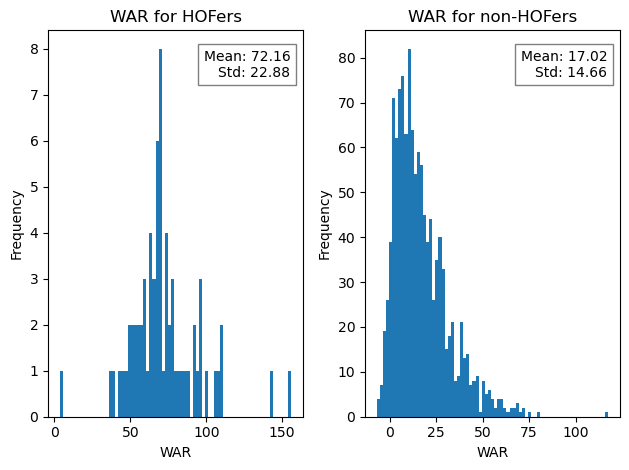

In [5]:
plt.subplot(1,2,1)
hof_war = data.loc[data['HOF Status'] == True, 'WAR']
# Creating plot
plotHist(hof_war, 75, 'WAR for HOFers', 'WAR', 'Frequency')
mean = np.mean(hof_war)
std = np.std(hof_war)
# Adding mean/std to plot
plt.text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.subplot(1,2,2)
non_hof_war = data.loc[data['HOF Status'] == False, 'WAR']
# Creating plot
plotHist(non_hof_war, 75, 'WAR for non-HOFers', 'WAR', 'Frequency')
mean = np.mean(non_hof_war)
std = np.std(non_hof_war)
# Adding mean/std to plot
plt.text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

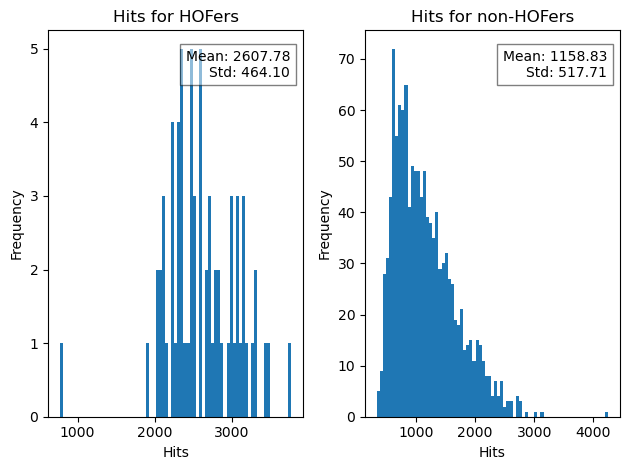

In [6]:
plt.subplot(1,2,1)
hof_hits = data.loc[data['HOF Status'] == True, 'H']
# Creating plot
plotHist(hof_hits, 75, 'Hits for HOFers', 'Hits', 'Frequency')
mean = np.mean(hof_hits)
std = np.std(hof_hits)
# Adding mean/std to plot
plt.text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.subplot(1,2,2)
non_hof_hits = data.loc[data['HOF Status'] == False, 'H']
# Creating plot
plotHist(non_hof_hits, 75, 'Hits for non-HOFers', 'Hits', 'Frequency')
mean = np.mean(non_hof_hits)
std = np.std(non_hof_hits)
# Adding mean/std to plot
plt.text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

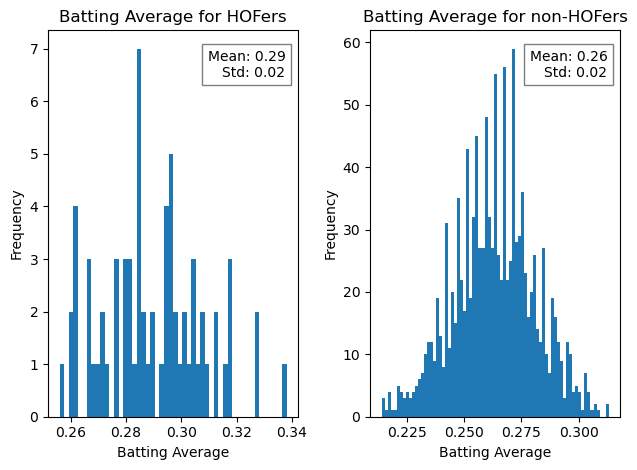

In [7]:
plt.subplot(1,2,1)
hof_avg = data.loc[data['HOF Status'] == True, 'BA']
# Creating plot
plotHist(hof_avg, 50, 'Batting Average for HOFers', 'Batting Average', 'Frequency')
mean = np.mean(hof_avg)
std = np.std(hof_avg)
# Adding mean/std to plot
plt.text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.subplot(1,2,2)
non_hof_avg = data.loc[data['HOF Status'] == False, 'BA']
# Creating plot
plotHist(non_hof_avg, 75, 'Batting Average for non-HOFers', 'Batting Average', 'Frequency')
mean = np.mean(non_hof_avg)
std = np.std(non_hof_avg)
# Adding mean/std to plot
plt.text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

As you can see, for those statistics which are cumulative over a player's entire career, such as WAR and Hits, the average and distribution of the values are drastically different between players which are members of the hall of fame and players which are not. In other words, these plots demonstrate the degree of seperations between the two categories of players.  

This will become important when we get to the feature engineering and selection process.

## Feature Engineering & Selection
To start off, I have selected a subset of features which I will use and have discarded the rest of the features.

In [8]:
features = ['R', 'H', '1B', '2B', '3B', 'HR', 'xbh', 'RBI', 'SB', 'CS', 'BB', 'IBB', 'SO', 'TB', 'WAR', 'WAA']
other_cols = ['Player', 'HOF Status', 'G', 'BA', 'OBP', 'SLG', 'OPS']

data = data[other_cols + features]

data.head()

,Player,HOF Status,G,BA,OBP,SLG,OPS,R,H,1B,2B,3B,HR,xbh,RBI,SB,CS,BB,IBB,SO,TB,WAR,WAA
0,Wayne Tolleson,False,863,0.241,0.307,0.293,0.600,301,559,473,60,17,9,86,133,108,41,219,0,384,680,2.3,-6.1
1,Gary Disarcina,False,1086,0.258,0.292,0.341,0.633,444,966,732,186,20,28,234,355,47,44,154,0,306,1276,11.2,-2.9
2,Darren Lewis,False,1354,0.250,0.323,0.322,0.645,607,1021,820,137,37,27,201,342,247,107,403,1,514,1313,10.5,-4.5
3,Brian Hunter,False,1000,0.264,0.313,0.346,0.660,500,882,683,146,28,25,199,241,260,61,243,1,581,1159,7.4,-4.4
4,Alvaro Espinoza,False,942,0.254,0.279,0.331,0.610,252,630,494,105,9,22,136,201,13,19,76,1,324,819,3.9,-5.1


Looking back to the EDA process, the feature values are different for the two classes of player (hall of fame & non-hall of fame). To eliminate this effect, I engineered features which average the features over a 162 game season.

In [9]:
for feature in features:
    data[f'{feature}_per_season'] = (data[feature] / data['G']) * 162

data.head()

,Player,HOF Status,G,BA,OBP,SLG,OPS,R,H,1B,2B,3B,HR,xbh,RBI,SB,CS,BB,IBB,SO,TB,WAR,WAA,R_per_season,H_per_season,1B_per_season,2B_per_season,3B_per_season,HR_per_season,xbh_per_season,RBI_per_season,SB_per_season,CS_per_season,BB_per_season,IBB_per_season,SO_per_season,TB_per_season,WAR_per_season,WAA_per_season
0,Wayne Tolleson,False,863,0.241,0.307,0.293,0.600,301,559,473,60,17,9,86,133,108,41,219,0,384,680,2.3,-6.1,56.502897,104.933951,88.790267,11.263036,3.191194,1.689455,16.143685,24.966396,20.273465,7.696408,41.110081,0.000000,72.083430,127.647740,0.431750,-1.145075
1,Gary Disarcina,False,1086,0.258,0.292,0.341,0.633,444,966,732,186,20,28,234,355,47,44,154,0,306,1276,11.2,-2.9,66.232044,144.099448,109.193370,27.745856,2.983425,4.176796,34.906077,52.955801,7.011050,6.563536,22.972376,0.000000,45.646409,190.342541,1.670718,-0.432597
2,Darren Lewis,False,1354,0.250,0.323,0.322,0.645,607,1021,820,137,37,27,201,342,247,107,403,1,514,1313,10.5,-4.5,72.624815,122.158050,98.109306,16.391433,4.426883,3.230428,24.048744,40.918759,29.552437,12.802068,48.217134,0.119645,61.497784,157.094535,1.256278,-0.538405
3,Brian Hunter,False,1000,0.264,0.313,0.346,0.660,500,882,683,146,28,25,199,241,260,61,243,1,581,1159,7.4,-4.4,81.000000,142.884000,110.646000,23.652000,4.536000,4.050000,32.238000,39.042000,42.120000,9.882000,39.366000,0.162000,94.122000,187.758000,1.198800,-0.712800
4,Alvaro Espinoza,False,942,0.254,0.279,0.331,0.610,252,630,494,105,9,22,136,201,13,19,76,1,324,819,3.9,-5.1,43.337580,108.343949,84.955414,18.057325,1.547771,3.783439,23.388535,34.566879,2.235669,3.267516,13.070064,0.171975,55.719745,140.847134,0.670701,-0.877070


Looking at a correlation matrix now using a heatmap we can see which features look promising and important to keep.

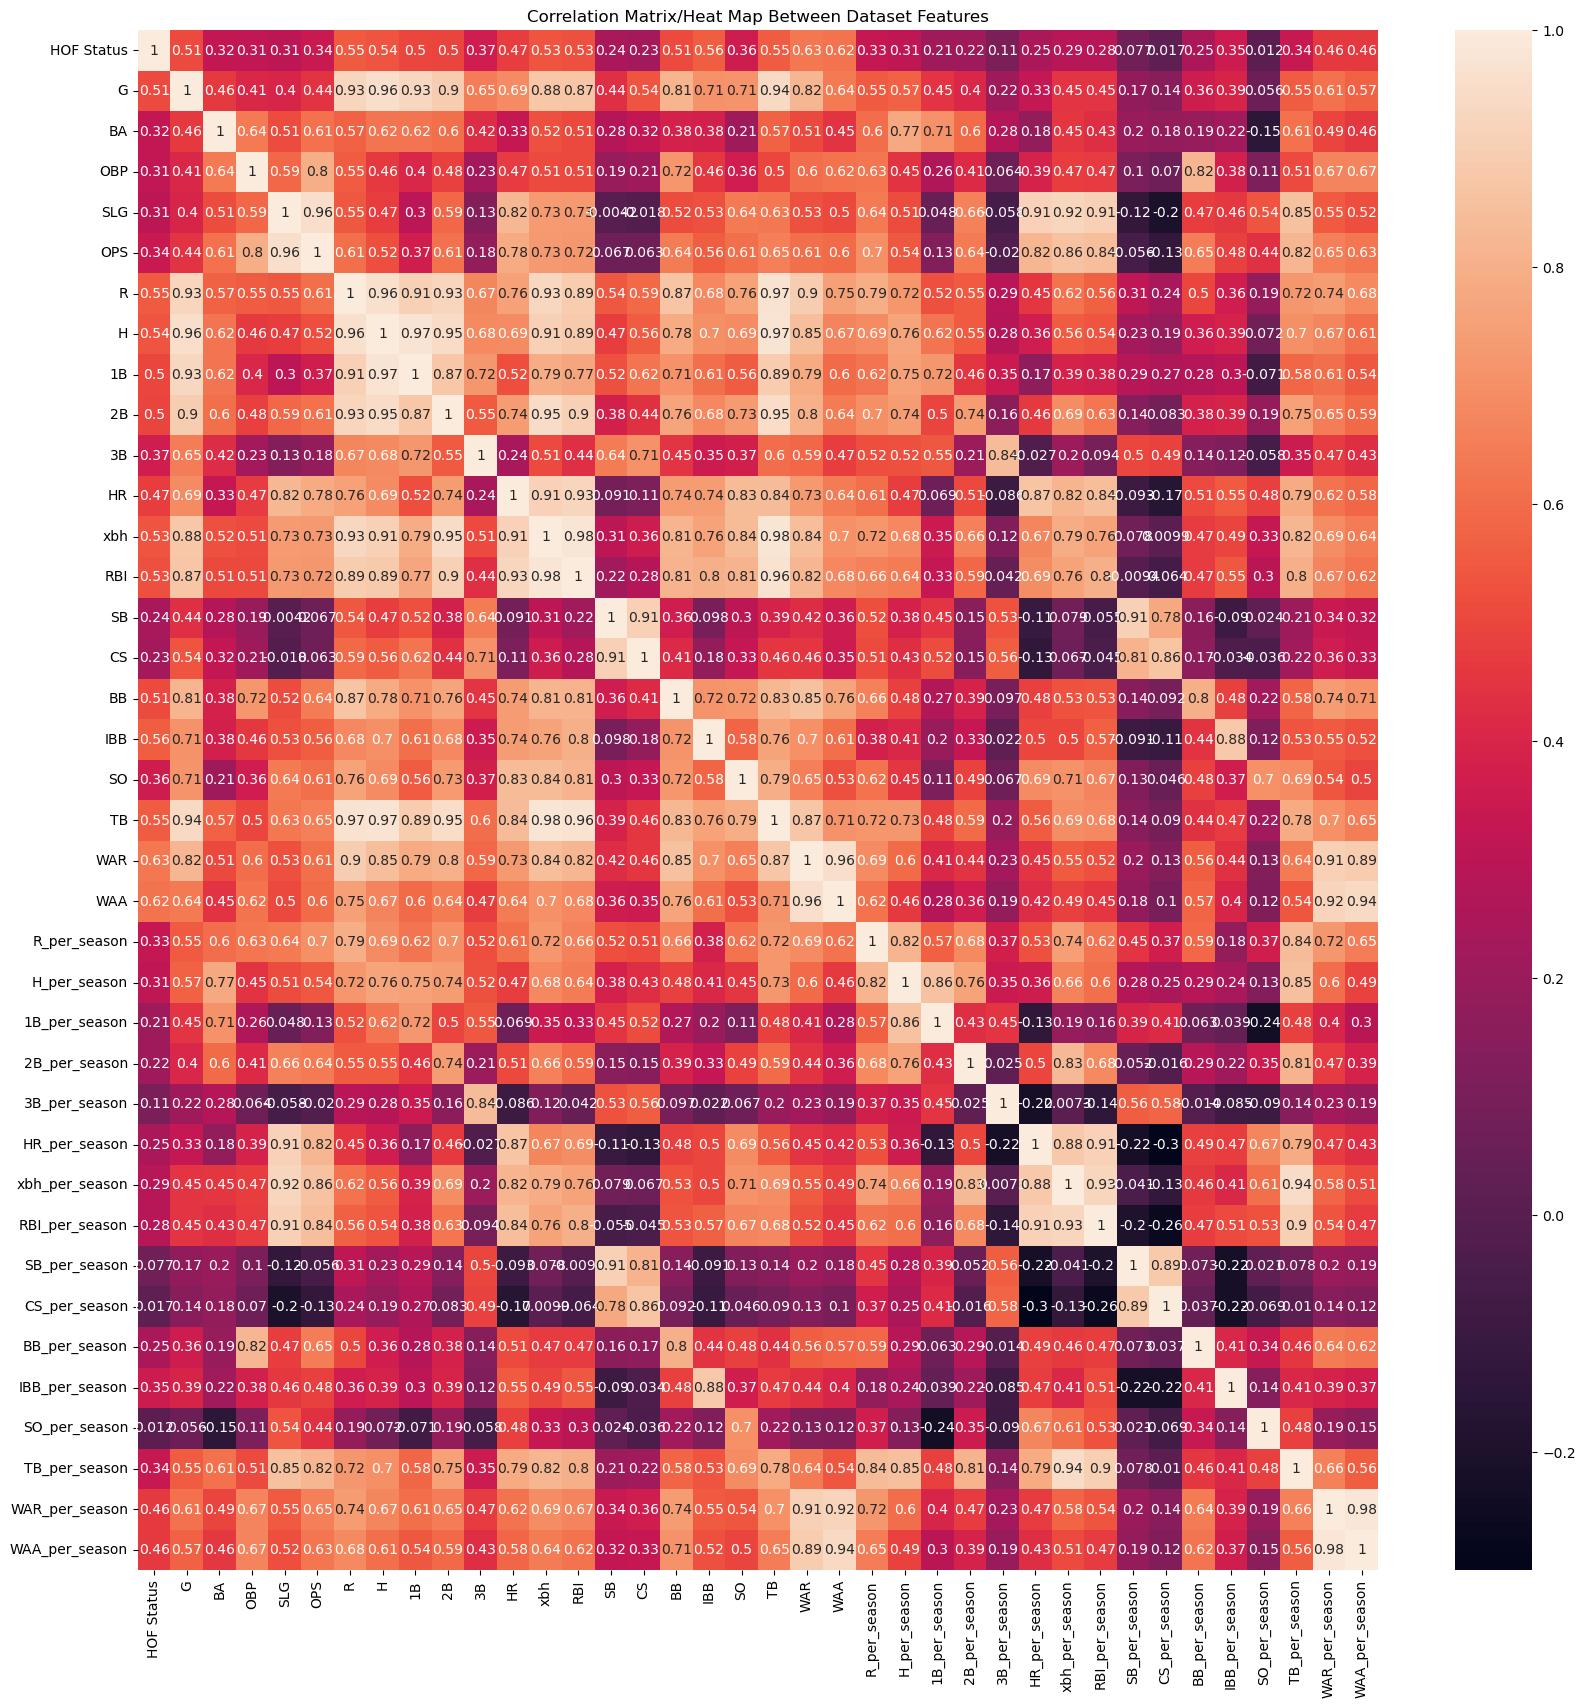

In [10]:
# Creating correlation matrix heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix/Heat Map Between Dataset Features')
plt.show()

In [11]:
data = data.drop(columns=features + ['G'])
data.head()

,Player,HOF Status,BA,OBP,SLG,OPS,R_per_season,H_per_season,1B_per_season,2B_per_season,3B_per_season,HR_per_season,xbh_per_season,RBI_per_season,SB_per_season,CS_per_season,BB_per_season,IBB_per_season,SO_per_season,TB_per_season,WAR_per_season,WAA_per_season
0,Wayne Tolleson,False,0.241,0.307,0.293,0.600,56.502897,104.933951,88.790267,11.263036,3.191194,1.689455,16.143685,24.966396,20.273465,7.696408,41.110081,0.000000,72.083430,127.647740,0.431750,-1.145075
1,Gary Disarcina,False,0.258,0.292,0.341,0.633,66.232044,144.099448,109.193370,27.745856,2.983425,4.176796,34.906077,52.955801,7.011050,6.563536,22.972376,0.000000,45.646409,190.342541,1.670718,-0.432597
2,Darren Lewis,False,0.250,0.323,0.322,0.645,72.624815,122.158050,98.109306,16.391433,4.426883,3.230428,24.048744,40.918759,29.552437,12.802068,48.217134,0.119645,61.497784,157.094535,1.256278,-0.538405
3,Brian Hunter,False,0.264,0.313,0.346,0.660,81.000000,142.884000,110.646000,23.652000,4.536000,4.050000,32.238000,39.042000,42.120000,9.882000,39.366000,0.162000,94.122000,187.758000,1.198800,-0.712800
4,Alvaro Espinoza,False,0.254,0.279,0.331,0.610,43.337580,108.343949,84.955414,18.057325,1.547771,3.783439,23.388535,34.566879,2.235669,3.267516,13.070064,0.171975,55.719745,140.847134,0.670701,-0.877070


Since we averaged the features in the engineering process on a per season basis, we can remove all the aggregate features and look at the correlation matrix heatmap again.

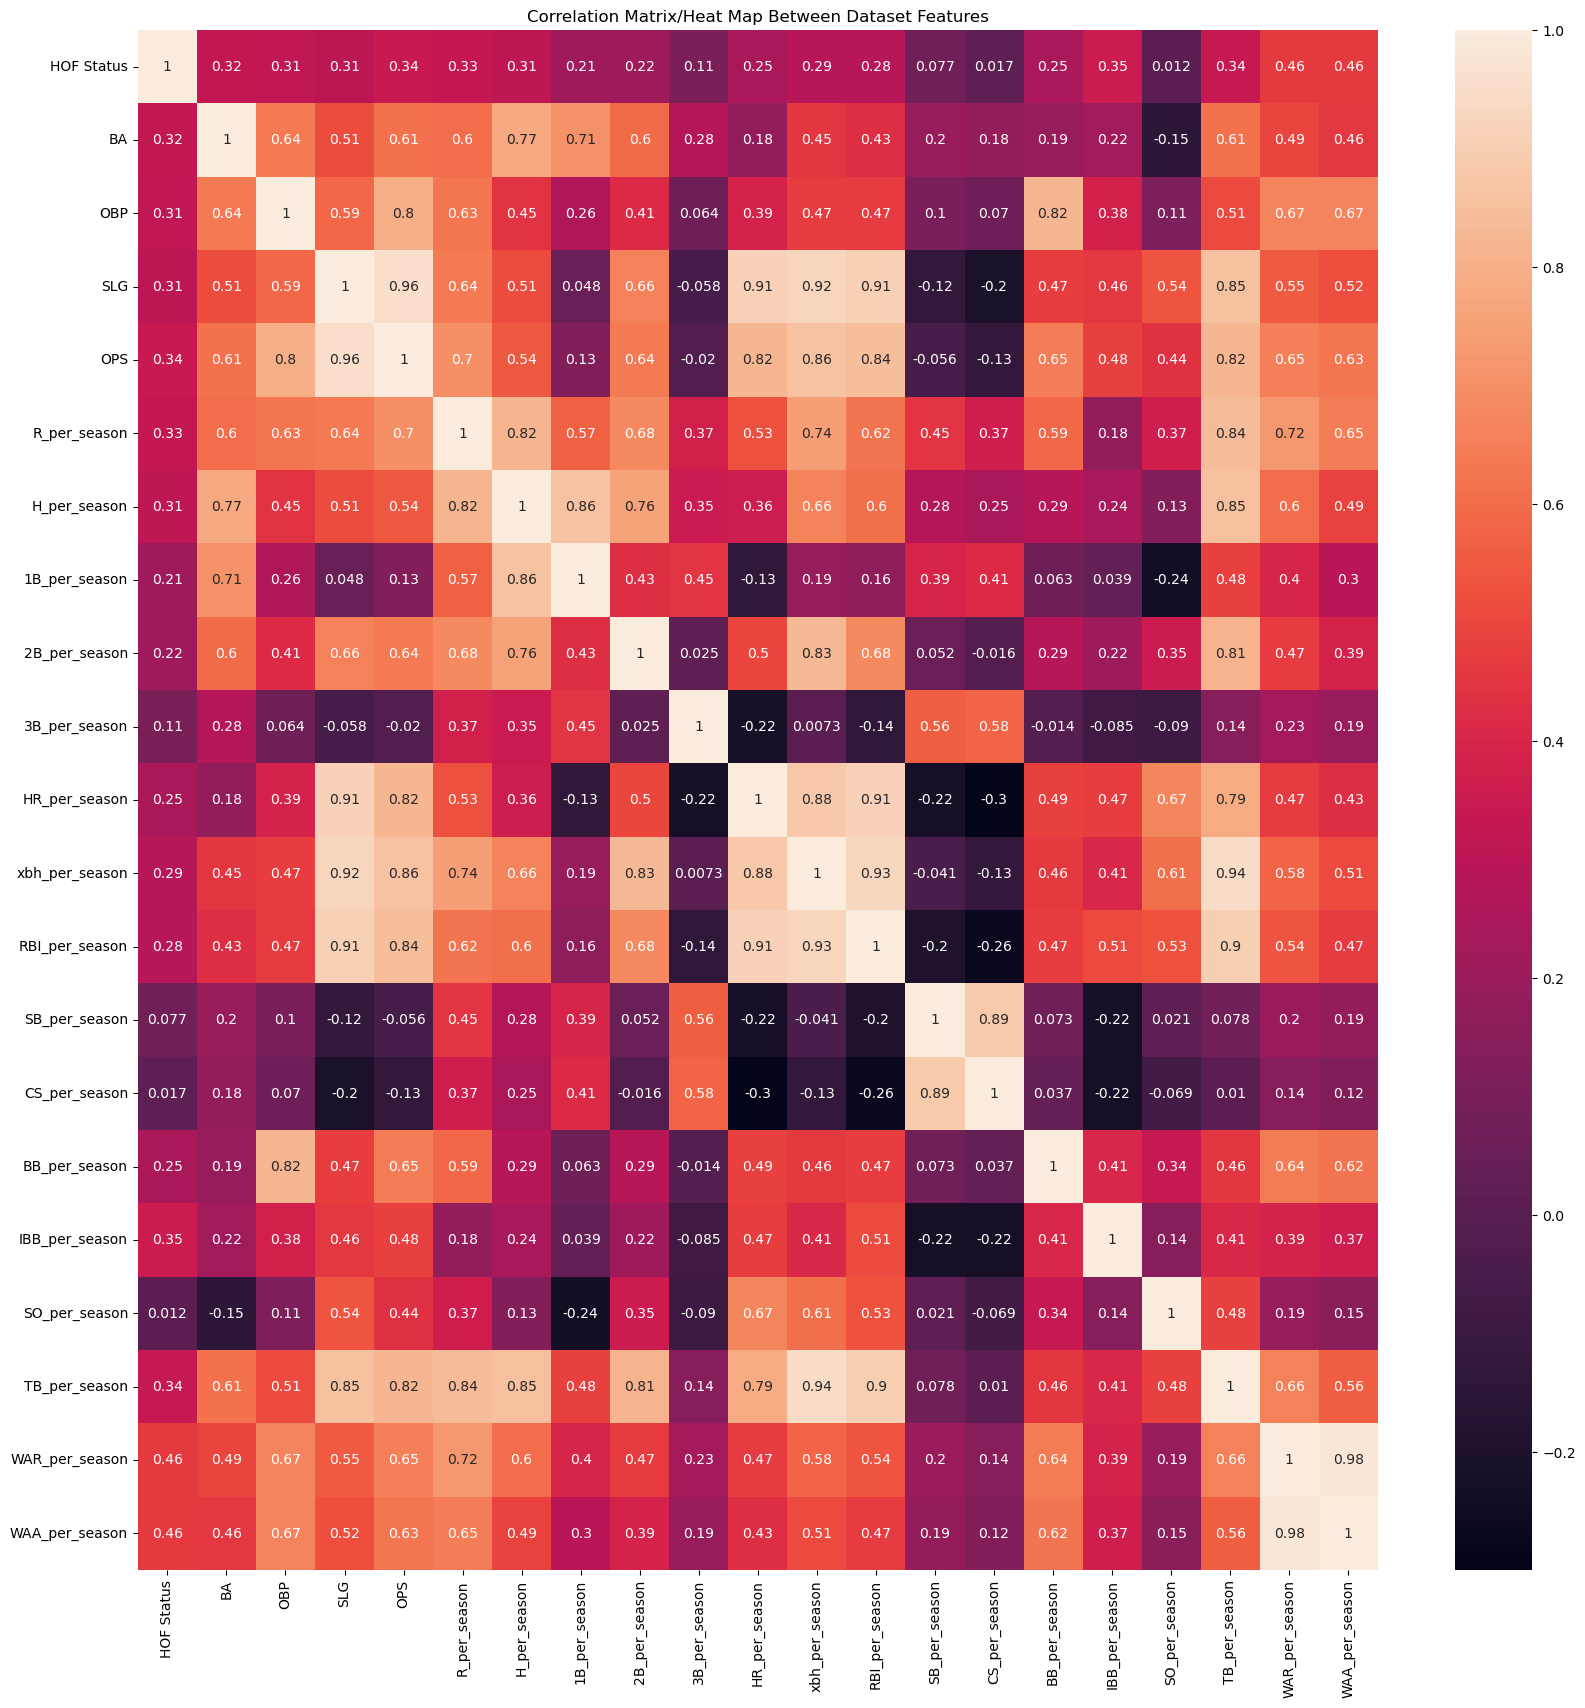

In [12]:
# Creating correlation matrix heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix/Heat Map Between Dataset Features')
plt.show()

Lastly, we need to change the 'HOF Status' column of our dataset, which is our target variable, to type integer instead of it being boolean.

In [13]:
# Converting boolean column to type integer
data['HOF Status'] = data['HOF Status'].astype(int)

final_data = data
final_data.head()

,Player,HOF Status,BA,OBP,SLG,OPS,R_per_season,H_per_season,1B_per_season,2B_per_season,3B_per_season,HR_per_season,xbh_per_season,RBI_per_season,SB_per_season,CS_per_season,BB_per_season,IBB_per_season,SO_per_season,TB_per_season,WAR_per_season,WAA_per_season
0,Wayne Tolleson,0,0.241,0.307,0.293,0.600,56.502897,104.933951,88.790267,11.263036,3.191194,1.689455,16.143685,24.966396,20.273465,7.696408,41.110081,0.000000,72.083430,127.647740,0.431750,-1.145075
1,Gary Disarcina,0,0.258,0.292,0.341,0.633,66.232044,144.099448,109.193370,27.745856,2.983425,4.176796,34.906077,52.955801,7.011050,6.563536,22.972376,0.000000,45.646409,190.342541,1.670718,-0.432597
2,Darren Lewis,0,0.250,0.323,0.322,0.645,72.624815,122.158050,98.109306,16.391433,4.426883,3.230428,24.048744,40.918759,29.552437,12.802068,48.217134,0.119645,61.497784,157.094535,1.256278,-0.538405
3,Brian Hunter,0,0.264,0.313,0.346,0.660,81.000000,142.884000,110.646000,23.652000,4.536000,4.050000,32.238000,39.042000,42.120000,9.882000,39.366000,0.162000,94.122000,187.758000,1.198800,-0.712800
4,Alvaro Espinoza,0,0.254,0.279,0.331,0.610,43.337580,108.343949,84.955414,18.057325,1.547771,3.783439,23.388535,34.566879,2.235669,3.267516,13.070064,0.171975,55.719745,140.847134,0.670701,-0.877070


## Model Training
As this is a classification problem, we need to use the appropriate machine learning models. The model's we will compare in this analysis are:
1. Logistic regression
2. K-nearest neighbors classifier
3. Decision tree classifier
4. Random forest classifier

Something important to note in the training process is stratification of the training data. We need to stratify our train/test datasets over the target variable since there are significantly more data entries which are non-hall of fame player than hall-of-fame players. Statifying the data means the proportion of data entries which are non-hall of fame to hall-of-fame is the same for bot the train and test datasets.  

I am using a 80/20 train/test split.

In [14]:
X = final_data.drop(columns=['Player', 'HOF Status'])
y = final_data['HOF Status']

# Creating train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

We need to scale the data in order to standardize the features. We use the sklearn.preprocessing.StandardScaler which uses z-score standardization (z = (x - u) / s). It is necessary to standardize the features to ensure each feature is equally weighted. It also helps models such as logistic regression and k-nearest neighbors to converge faster and perform better.

In [15]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

When training some of the models, there is an opportunity for tuning/optimizing the hyperparameters. in this analysis, I chose to use GridSearchCV (grid search cross-validation), to optimize hyperparameters of K-NN, Decision Tree, and Random Forest.

**Logistic Regression:**

In [16]:
# Creating & training model
reg_model = LogisticRegression(max_iter=10000)
reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

**K-Nearest Neighbors Classifier:**

In [17]:
# Tuning hyperparameter n_nieghbors (k)
knn_model = KNeighborsClassifier()

param_gird = {'n_neighbors': [1,3,5,7,8,11,13,15]}

grid_search = GridSearchCV(estimator=knn_model, param_grid=param_gird, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

optimal_n_neighbors = grid_search.best_params_['n_neighbors']
print(f'Optimal number of neighbors: {optimal_n_neighbors}')

# Creating & training model
optimal_knn_model = KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
optimal_knn_model.fit(X_train_scaled, y_train)

Optimal number of neighbors: 15


KNeighborsClassifier(n_neighbors=15)

**Decision Tree Classifier:**

In [18]:
# Tuning hyperparameter max_depth
tree_model = DecisionTreeClassifier()

param_grid = {'max_depth': range(1, 20)}

grid_search = GridSearchCV(tree_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

optimal_max_depth = grid_search.best_params_['max_depth']
print(f'Optimal max depth: {optimal_max_depth}')

# Creating & training model
optimal_tree_model = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
optimal_tree_model.fit(X_train_scaled, y_train)

Optimal max depth: 1


DecisionTreeClassifier(max_depth=1, random_state=42)

**Random Forest Classifier:**

In [19]:
# Tuning hyperparameter n_estimators
rf_model = RandomForestClassifier()

param_grid = {'n_estimators': [50, 100, 150, 200]}

grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

optimal_n_estimators = grid_search.best_params_['n_estimators']
print(f'Optimal n estimators: {optimal_n_estimators}')

# Creating & training model
optimal_rf_model = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
optimal_rf_model.fit(X_train_scaled, y_train)

Optimal n estimators: 150


RandomForestClassifier(n_estimators=150, random_state=42)

## Model Evaluation  
For classification problems, there are many ways to evaluate the performance of a model. The ones I will use are:
1. Accuracy
2. Precision
3. Recall
4. F1-Score

In [20]:
# Logistic Regression
y_pred_reg = reg_model.predict(X_test)

accuracy_reg = accuracy_score(y_test, y_pred_reg) * 100
conf_matrix_reg = confusion_matrix(y_test, y_pred_reg)
precision_reg = conf_matrix_reg[0,0] / (conf_matrix_reg[0,0] + conf_matrix_reg[0,1]) * 100
recall_reg = conf_matrix_reg[0,0] / (conf_matrix_reg[0,0] + conf_matrix_reg[1,0]) * 100
f1_reg = 2 * ((precision_reg * recall_reg) / (precision_reg + recall_reg)) / 100

# K-Nearest Neighbors Classifier
y_pred_knn = optimal_knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
precision_knn = conf_matrix_knn[0,0] / (conf_matrix_knn[0,0] + conf_matrix_knn[0,1]) * 100
recall_knn = conf_matrix_knn[0,0] / (conf_matrix_knn[0,0] + conf_matrix_knn[1,0]) * 100
f1_knn = 2 * ((precision_knn * recall_knn) / (precision_knn + recall_knn)) / 100

# Decision Tree Classifier
y_pred_tree = optimal_tree_model.predict(X_test_scaled)

accuracy_tree = accuracy_score(y_test, y_pred_tree) * 100
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
precision_tree = conf_matrix_tree[0,0] / (conf_matrix_tree[0,0] + conf_matrix_tree[0,1]) * 100
recall_tree = conf_matrix_tree[0,0] / (conf_matrix_tree[0,0] + conf_matrix_tree[1,0]) * 100
f1_tree = 2 * ((precision_tree * recall_tree) / (precision_tree + recall_tree)) / 100

# Random Forest Classifier
y_pred_rf = optimal_rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = conf_matrix_rf[0,0] / (conf_matrix_rf[0,0] + conf_matrix_rf[0,1]) * 100
recall_rf = conf_matrix_rf[0,0] / (conf_matrix_rf[0,0] + conf_matrix_rf[1,0]) * 100
f1_rf = 2 * ((precision_rf * recall_rf) / (precision_rf + recall_rf)) / 100


# Creating a dataframe to display the results
results = pd.DataFrame({'Model': 
                        ['Logistic Regression', 'K-Nearest Neighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
                        'Accuracy (%)':
                        [accuracy_reg , accuracy_knn, accuracy_tree, accuracy_rf],
                        'Precision (%)':
                        [precision_reg, precision_knn, precision_tree, precision_rf],
                        'Recall (%)':
                        [recall_reg, recall_knn, recall_tree, recall_rf],
                        'F1 Score':
                        [f1_reg, f1_knn, f1_tree, f1_rf]
                       })

results

,Model,Accuracy (%),Precision (%),Recall (%),F1 Score
0,Logistic Regression,95.703125,98.347107,97.142857,0.977413
1,K-Nearest Neighbors Classifier,95.312500,99.586777,95.634921,0.975709
2,Decision Tree Classifier,92.578125,95.041322,97.046414,0.960334
3,Random Forest Classifier,94.921875,98.347107,96.356275,0.973415


## Conclusion

Best model...